# LABORATORIO 2:
Primero se importan las librerias necesarias par el objetivo:
- os: utilizado para manejos de directorios y rutas
- numpy: utilizado para los vectores
- matplotlib: trazado de gráficos
- pandas: para el preprocesamiento de los datos
- PolynomialFeatures: para la regresion polinomial

In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

# Para mostrar gráficos dentro del cuaderno
%matplotlib inline

## Dataset elegido: California Housing (1990 Census)

Fuente: https://www.kaggle.com/code/paultimothymooney/predict-california-housing-prices-with-tensorflow

Objetivo: predecir el valor mediano de las casas (median_house_value) en distintas áreas de California.

Tipo de problema: regresión (variable objetivo continua).

## ¿Por qué fue elegido para el laboratorio?
- Más de 20 000 ejemplos → cumple con m ≥ 10 000.
- 9 columnas numéricas + 1 categórica → cumple con n ≥ 10 tras one-hot encoding.
- Permite entrenar modelos de regresión lineal y polinómica.
- Permite usar ecuación normal para calcular θ directamente.
- Permite observar relaciones lineales y no lineales entre X y y.
- Permite preprocesar una columna categórica (ocean_proximity)
- Todas las demás columnas ya son numéricas → listo para normalización y regresión.

## Preprocesamiento de datos:
Dado que tenemos una columna categorica, primero debemos preprocesar la columna y convertirla a valores numericos:

In [36]:
# Cargar dataset
df = pd.read_csv('housing.csv')

# Reemplazar valores faltantes
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())

# Convertir variable categórica en variables binarias
df = pd.get_dummies(df, columns=['ocean_proximity'])

Ahora todas las columnas son numéricas y listas para regresión.

## Separamos X y Y:

In [38]:
# Definir variable objetivo y características
y = df['median_house_value'].values
X = df.drop('median_house_value', axis=1).astype(float).values

print("Primeras 5 filas de X:")
print(X[:5])
print("Primeras 5 etiquetas y:")
print(y[:5])


Primeras 5 filas de X:
[[-1.2223e+02  3.7880e+01  4.1000e+01  8.8000e+02  1.2900e+02  3.2200e+02
   1.2600e+02  8.3252e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00]
 [-1.2222e+02  3.7860e+01  2.1000e+01  7.0990e+03  1.1060e+03  2.4010e+03
   1.1380e+03  8.3014e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00]
 [-1.2224e+02  3.7850e+01  5.2000e+01  1.4670e+03  1.9000e+02  4.9600e+02
   1.7700e+02  7.2574e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.2740e+03  2.3500e+02  5.5800e+02
   2.1900e+02  5.6431e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00]
 [-1.2225e+02  3.7850e+01  5.2000e+01  1.6270e+03  2.8000e+02  5.6500e+02
   2.5900e+02  3.8462e+00  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00
   0.0000e+00]]
Primeras 5 etiquetas y:
[452600. 358500. 352100. 341300. 342200.]


## Normalización de los caracteres:
Ahora X_norm tiene media 0 y desviación estándar 1 para cada columna.

Esto mejora la convergencia del gradiente descendente y la estabilidad de los modelos.

In [39]:
def normalizarCaracteristicas(X):
    X_norm = X.copy()
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = normalizarCaracteristicas(X)
print("Shape de X normalizado:", X_norm.shape)


Shape de X normalizado: (20640, 13)


## Funciones de costo, descenso por el gradiente y normal:

In [40]:
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    error = X.dot(theta) - y.reshape(-1,1)
    J = (1/(2*m)) * np.sum(error**2)
    return J

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []
    for i in range(num_iters):
        error = X.dot(theta) - y.reshape(-1,1)
        theta = theta - (alpha/m) * X.T.dot(error)
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

def normalEqn(X, y):
    theta = np.dot(np.linalg.pinv(X.T.dot(X)), X.T.dot(y))
    return theta


## Dividir los datos en entrenamiento y prueba:

In [41]:
# Últimos 100 para prueba
X_train = X_norm[:-100, :]
y_train = y[:-100]
X_test = X_norm[-100:, :]
y_test = y[-100:]

# Añadir columna de 1 para término de intersección
X_train_b = np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_b = np.c_[np.ones((X_test.shape[0],1)), X_test]


## Regresion lineal multivariable:

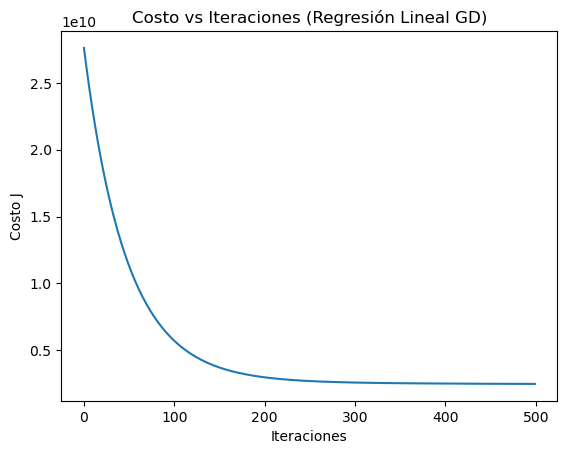

In [42]:
theta_init = np.zeros((X_train_b.shape[1],1))
alpha = 0.01
num_iters = 500

theta_lin, J_history_lin = gradientDescentMulti(X_train_b, y_train, theta_init, alpha, num_iters)

# Graficar costo
plt.plot(J_history_lin)
plt.xlabel('Iteraciones')
plt.ylabel('Costo J')
plt.title('Costo vs Iteraciones (Regresión Lineal GD)')
plt.show()

# Predicciones
y_pred_lin = X_test_b.dot(theta_lin).flatten()


## Regresion Polinomica:

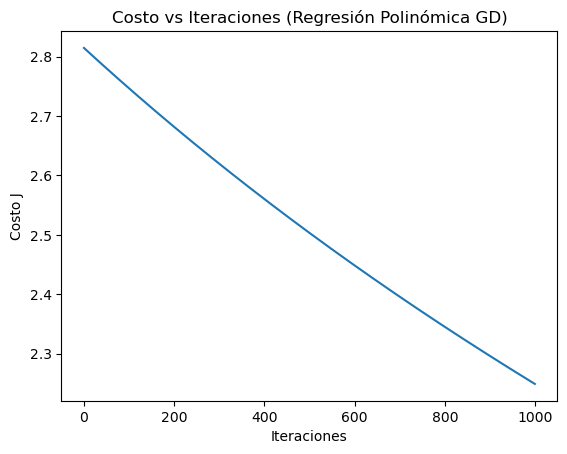

In [43]:
# Escalar y para GD polinómico
y_train_scaled = y_train / 100000
y_test_scaled = y_test / 100000

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

X_poly_train_norm, mu_poly, sigma_poly = normalizarCaracteristicas(X_poly_train)
X_poly_test_norm = (X_poly_test - mu_poly) / sigma_poly

X_poly_train_b = np.c_[np.ones((X_poly_train_norm.shape[0],1)), X_poly_train_norm]
X_poly_test_b = np.c_[np.ones((X_poly_test_norm.shape[0],1)), X_poly_test_norm]

theta_poly_init = np.zeros((X_poly_train_b.shape[1],1))
alpha_poly = 0.0001
num_iters_poly = 1000

theta_poly, J_history_poly = gradientDescentMulti(X_poly_train_b, y_train_scaled, theta_poly_init, alpha_poly, num_iters_poly)

# Graficar costo
plt.plot(J_history_poly)
plt.xlabel('Iteraciones')
plt.ylabel('Costo J')
plt.title('Costo vs Iteraciones (Regresión Polinómica GD)')
plt.show()

# Predicciones
y_pred_poly = (X_poly_test_b.dot(theta_poly) * 100000).flatten()


## Regresion usando la Ecuación Normal (Solución Analítica):

In [44]:
# Lineal
theta_normal_lin = normalEqn(X_train_b, y_train)
J_normal_lin = computeCostMulti(X_train_b, y_train, theta_normal_lin)

# Polinómica
theta_normal_poly = normalEqn(X_poly_train_b, y_train_scaled)
y_pred_normal_poly = (X_poly_test_b.dot(theta_normal_poly) * 100000).flatten()
J_normal_poly = computeCostMulti(X_poly_train_b, y_train_scaled, theta_normal_poly)

print("Costo Lineal Normal:", J_normal_lin)
print("Costo Polinómico Normal:", J_normal_poly)


Costo Lineal Normal: 224945160600125.03
Costo Polinómico Normal: 23391.127292864454


## Comparacion de Predicciones en todos los casos:

In [45]:
print("Primeras 5 predicciones GD Lineal:", y_pred_lin[:5])
print("Primeras 5 predicciones GD Polinómica:", y_pred_poly[:5])
print("Primeras 5 predicciones Normal Polinómica:", y_pred_normal_poly[:5])
print("Valores reales:", y_test[:5])



Primeras 5 predicciones GD Lineal: [123031.42068315 185331.60444857 191665.97357916 116831.69703492
  77132.57134119]
Primeras 5 predicciones GD Polinómica: [-22197.02566951 -14085.92232481 -16840.05152817   -834.03049297
   3915.02804299]
Primeras 5 predicciones Normal Polinómica: [125670.13079529 175112.55508856 174498.31522403 136588.40128702
  83595.87920583]
Valores reales: [194300. 226500. 236200. 182600. 219400.]


NOTA: Las predicciones anteriores del GD polinómico estaban fuera de escala.
Esto ocurre porque el alpha original era demasiado grande para la regresión polinómica
con muchas características (grado 2), lo que provoca que el gradiente descendente diverja.

Para demostrarlo, probamos un alpha más pequeño y más iteraciones:

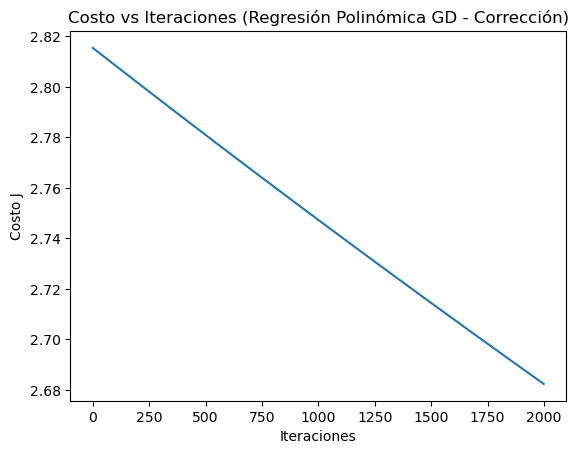

Predicciones Polinómicas GD Corregidas (primeras 5): [-6432.5195892  -4180.71918442 -5028.16508859  -506.6863944
   837.88111132]
Valores reales (primeras 5): [194300. 226500. 236200. 182600. 219400.]


In [46]:
alpha_fix = 1e-5
num_iters_fix = 2000

theta_poly_fix, J_history_poly_fix = gradientDescentMulti(X_poly_train_b, y_train_scaled, theta_poly_init, alpha_fix, num_iters_fix)

# Graficar costo corregido
plt.plot(J_history_poly_fix)
plt.xlabel('Iteraciones')
plt.ylabel('Costo J')
plt.title('Costo vs Iteraciones (Regresión Polinómica GD - Corrección)')
plt.show()

# Predicciones con GD corregido
y_pred_poly_fix = (X_poly_test_b.dot(theta_poly_fix) * 100000).flatten()

# Comparación primeras 5 predicciones vs valores reales
print("Predicciones Polinómicas GD Corregidas (primeras 5):", y_pred_poly_fix[:5])
print("Valores reales (primeras 5):", y_test[:5])

## Conclusión

Como podemos observar, incluso al reducir el `alpha` y aumentar las iteraciones, el gradiente descendente polinómico **no logra converger correctamente**.  
Por ello, es preferible usar la **ecuación normal** para calcular los valores de `theta` en regresión polinómica, ya que con este método los parámetros convergen y las predicciones son más precisas.
